<a href="https://colab.research.google.com/github/andysontran/13-CHL5230-F23/blob/main/Datathon2_ARcode_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the Cardiovascular Event Dataset
data = pd.read_csv('Cardiovascular Event Dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**DATA PRE-PROCESSING**

In [4]:
# Remove the id row
data.drop('id', axis=1, inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


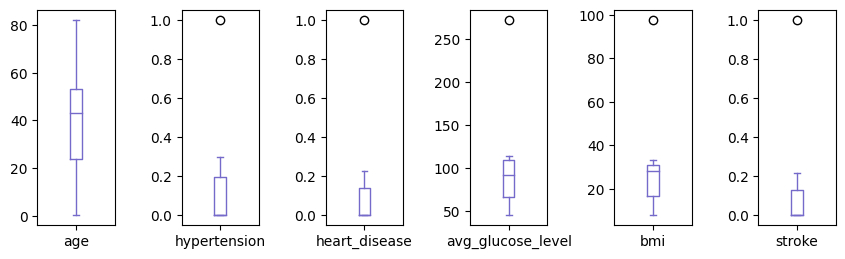

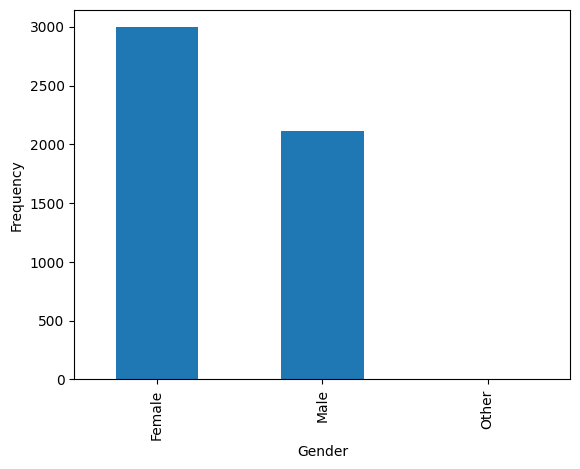

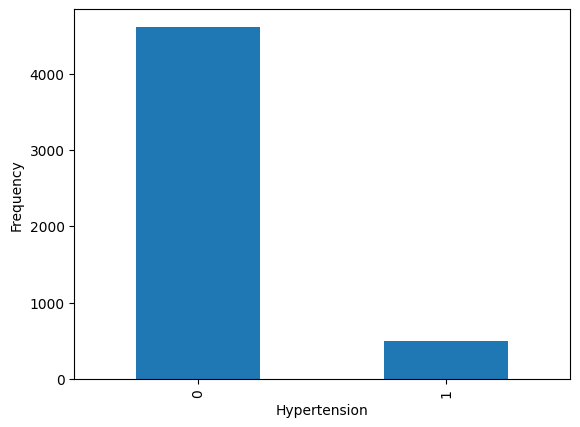

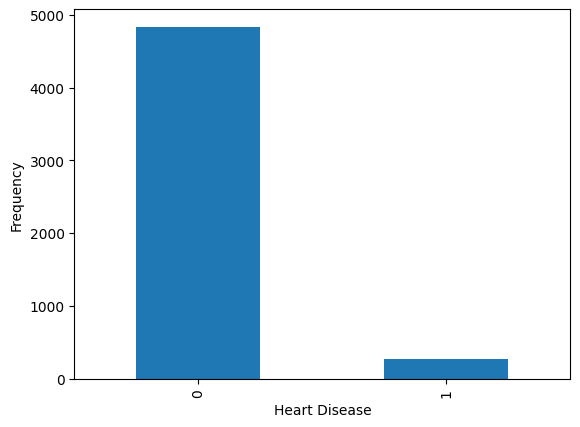

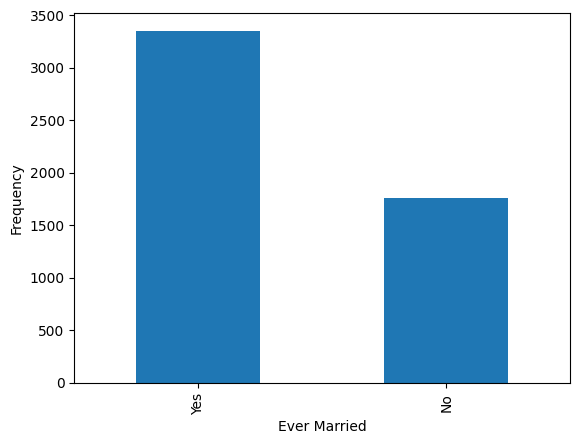

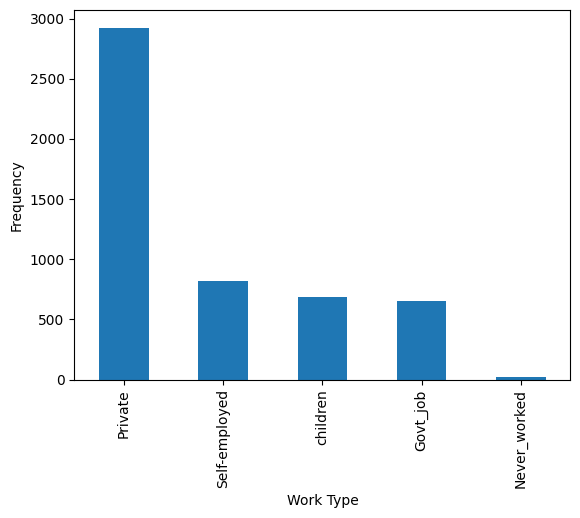

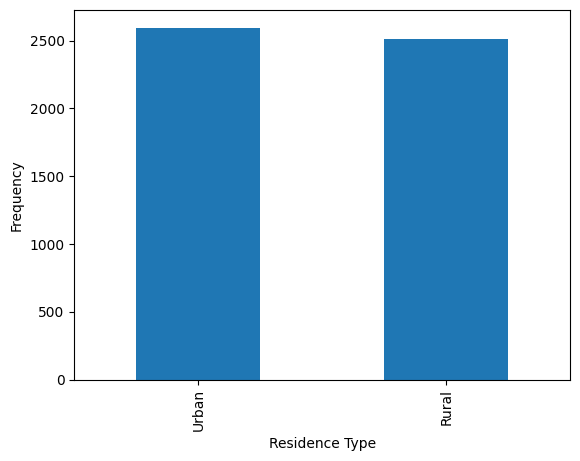

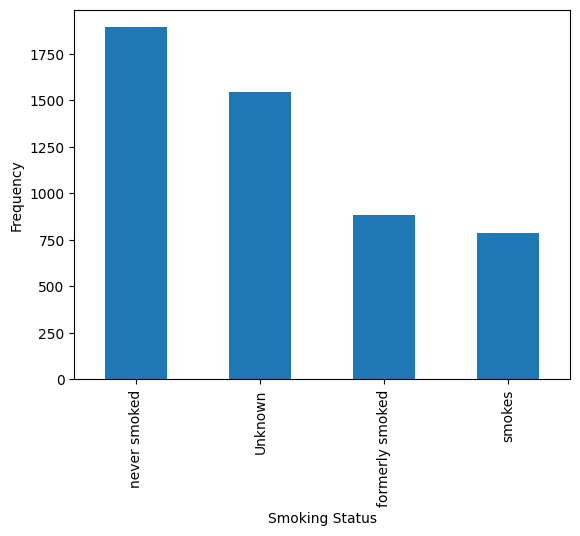

In [5]:
# Exploration of the dataset, dropping the 'count' row for better visualization
description = data.describe()
description
description = description.drop('count')

# Plot some graphs to visually show data distribution

# Box and whisker plots (only looking at continuous variables)
description.plot(kind='box', subplots=True, layout=(2, 7), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

# Bar graphs (for categorical variables)
data['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()
data['hypertension'].value_counts().plot(kind='bar')
plt.xlabel('Hypertension')
plt.ylabel('Frequency')
plt.show()
data['heart_disease'].value_counts().plot(kind='bar')
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.show()
data['ever_married'].value_counts().plot(kind='bar')
plt.xlabel('Ever Married')
plt.ylabel('Frequency')
plt.show()
data['work_type'].value_counts().plot(kind='bar')
plt.xlabel('Work Type')
plt.ylabel('Frequency')
plt.show()
data['Residence_type'].value_counts().plot(kind='bar')
plt.xlabel('Residence Type')
plt.ylabel('Frequency')
plt.show()
data['smoking_status'].value_counts().plot(kind='bar')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Since smoking_status has more than 1500 Unknown values, which is about 30% of the sample, we decided to exclude this variable from our analysis
data.drop ('smoking_status', axis=1, inplace=True)

In [7]:
# Since gender=Other only has 1 observation in the dataset, we decided to drop this row from our analysis
data.drop(3116,axis=0,inplace=True)

In [9]:
# Remove outliers in BMI, specifically the observations with BMI=97.6, 92, and 78
data.drop(2128,axis=0,inplace=True)
data.drop(4209,axis=0,inplace=True)
data.drop(928,axis=0,inplace=True)

In [15]:
# Since children in the dataset skew age and BMI (and as BMI is not as accurate for youth), we decided to restrict our models to adults only, so remove work_type=children
data = data[data.work_type != 'children']

In [17]:
# Code the binary variables gender, ever_married, Residence_type into numerical values;
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['ever_married'] = data['ever_married'].map({'No': 0, 'Yes': 1})
data['Residence_type'] = data['Residence_type'].map({'Rural': 0, 'Urban': 1})

In [18]:
# Create one-hot coding for work_type
data['work_type_Private'] = np.where(data['work_type']=='Private', 1, 0)
data['work_type_Selfemployed'] = np.where(data['work_type']=='Self-employed', 1, 0)
data['work_type_Govtjob'] = np.where(data['work_type']=='Govt_job', 1, 0)
data['work_type_Never'] = np.where(data['work_type']=='Never_worked', 1, 0)

In [19]:
# Check for missing values in each column
print(data.isnull().sum())

gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                       185
stroke                      0
work_type_Private           0
work_type_Selfemployed      0
work_type_Govtjob           0
work_type_Never             0
dtype: int64


In [20]:
# For BMI, replace zeros with nan to handle missing values
data[['bmi']] = data[['bmi']].replace(0, np.nan)

# Fill missing values with median
data.fillna(data.median(), inplace=True)

# Check to see if there are no more missing values
print(data.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
stroke                    0
work_type_Private         0
work_type_Selfemployed    0
work_type_Govtjob         0
work_type_Never           0
dtype: int64


In [21]:
# Explore dataset again, after pre-processing of data
description = data.describe()
description


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Selfemployed,work_type_Govtjob,work_type_Never
count,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000
mean,0.603530,48.898846,0.112016,0.062231,0.758543,0.508712,107.994956,30.204945,0.055895,0.661009,0.185336,0.148676,0.004979
std,0.489219,18.701545,0.315422,0.241602,0.428015,0.499981,47.270453,7.017585,0.229745,0.473420,0.388614,0.355809,0.070391
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,0.000000,77.460000,25.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,50.000000,0.000000,0.000000,1.000000,1.000000,92.160000,29.050000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,63.000000,0.000000,0.000000,1.000000,1.000000,115.885000,33.700000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,71.900000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

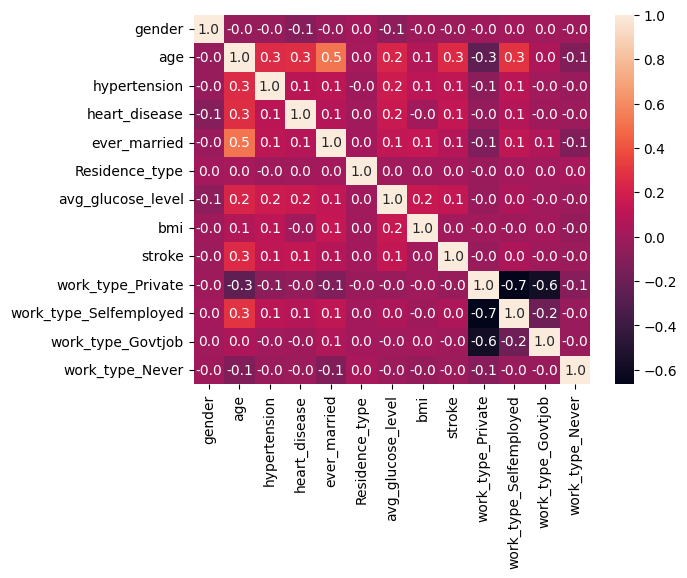

In [22]:
# Correlation matrix to quantify relationships (this might not be super helpful for us, since we have so many categorical variables. i think we should just fix for collinearity using L1 or L2
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f")
# For the continuous variables, they don't seem to be heavily correlated with each other